In [1]:
# import
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
# read the dataset
df = pd.read_excel('sample_data_v4.xlsx')
df.shape

(2168, 11)

In [3]:
# print the head
df.head()

,Application ID,Current City,Other skills,Institute,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,MS0001,Pune,"Machine Learning, Python",Don Bosco Institute of Technology,Bachelor of Engineering (B.E),Mechanical Engineering,2018,NaN,8.13/10,NaN,NaN
1,MS0002,Pune,"Machine Learning, Python","PES MCOE, Pune",Bachelor of Engineering (B.E),Electronics and Telecommunication Engineering ...,2018,NaN,66.00/100,NaN,NaN
2,MS0003,Navi Mumbai,"Data Analytics, Data Science, Machine Learning...",Imarticus Learning,PG Diploma in Data Science,NaN,2020,NaN,7.00/10,NaN,NaN
3,MS0004,Bangalore,"Data Analytics, Algorithms, C Programming, Dat...",Dayananda Sagar Institutions,Bachelor of Technology (B.Tech),Information Technology,2022,NaN,NaN,86.80/86.80,10.00/10.00
4,MS0005,Mumbai,"Artifical Intelligence, Computer Vision, Deep ...",Pillai Hoc College Of Engineering And Technolo...,Bachelor of Engineering (B.E),Information Technology,2020,NaN,6.22/10,NaN,NaN


In [4]:
# Drop the columns which are not required
dataset = df.drop(["Current City", "Degree", "Stream", "Current Year Of Graduation"], axis=1)

In [5]:
# print all the NaN values in the dataset
for c in dataset.columns:
    print(c, end=": ")
    print(sum(dataset[c].isnull()))

Application ID: 0
Other skills: 38
Institute: 13
Performance_PG: 1817
Performance_UG: 334
Performance_12: 780
Performance_10: 880


In [6]:
# Drop rows with "NaN" values in "Other skill" and "Institute"
dataset = dataset.dropna(subset=["Institute", "Other skills"])

In [7]:
# Cleaning the Other skills column
# Replace the list of skills with a scalar number
# w.r.t the requirements mentioned
requirements = {"web_developer": ["HTML", "CSS", "Bootstrap", "AJAX", "JavaScript", "PHP", "MySQL", "REST API", "AWS/GCP",
                                  "Git/GitHub", "Python", "Linux", "JSON", "Authentication/Authorization (JWT)"],
               "full_stack_developer": ["HTML", "CSS", "MongoDB", "Express", "React.js", "Node.js", "ES6", "Redux",
                                        "JavaScript", "AWS/GCP", "Python", "Linux", "JSON", "Authentication/Authorization (JWT)"],
                "ml_developer": ["Python", "TensorFlow", "PyTorch", "NumPy", "PyPI", "Sci-kit learn", "Statistical Modelling", 
                                 "Machine Learning", "Deep Learning", "SQL", "JSON", "AWS/GCP/Heroku", "Flask"]}

In [8]:
SkillScore = list()

for r in dataset["Other skills"]:
    wd = 0
    fsd = 0
    mld = 0
    
    skills = r.split(", ")
    for skill in skills:
        if skill in requirements["web_developer"]:
            wd += 1
        if skill in requirements["full_stack_developer"]:
            fsd += 1
        if skill in requirements["ml_developer"]:
            mld += 1
    
    rel_wd = wd / len(requirements["web_developer"])
    rel_fsd = fsd / len(requirements["full_stack_developer"])
    rel_mld = mld / len(requirements["ml_developer"])
    
    SkillScore.append(max(rel_wd, rel_fsd, rel_mld))      

# SkillScore = pd.DataFrame(SkillScore)
# SkillScore.shape

In [9]:
# Cleaning Institute column
# Replace the institute names with their tiers
# Tier 1: "IIT" and "NIT" Institutes
# Keep Tier as boolean value: 
# 1 -> Tier 1       0 -> Not Tier 1
Tier = []
for inst in dataset["Institute"]:
    if (inst.count("IIT ") or (inst.count("NIT "))): 
        Tier.append(1)
    else:
        Tier.append(0)

# Tier = pd.DataFrame(Tier)
# Tier.shape

In [10]:
# Cleaning Performance_10 column
# Replace the string values with their numeric form
P_10 = []

for r in dataset["Performance_10"]:
    if type(r) == str:
        marks = float(r.split("/")[0])
        if marks > 10:
            marks /= 10
    else:
        marks = "NaN"
    
    P_10.append(marks)

# P_10 = pd.DataFrame(P_10)
# P_10.shape

In [11]:
# Cleaning Performance_12 column
# Replace the string values with their numeric form
P_12 = []

for r in dataset["Performance_12"]:
    if type(r) == str:
        marks = float(r.split("/")[0])
        if marks > 10:
            marks /= 10
    else:
        marks = "NaN"
    
    P_12.append(marks)

# P_12 = pd.DataFrame(P_12)
# P_12.shape

In [12]:
# Cleaning Performance_UG column
# Replace the string values with their numeric form
UG = []
for r in dataset["Performance_UG"]:
    if type(r) == str:
        marks, total = float(r.split("/")[0]), float(r.split("/")[1])
        if total == 100:
            marks /= 10
    else:
        marks = "NaN"
    
    UG.append(marks)

# UG = pd.DataFrame(UG)
# UG.shape

In [13]:
# Cleaning Performance_PG column
# Replace the string values with their numeric form
PG = []
for r in dataset["Performance_PG"]:
    if type(r) == str:
        marks, total = float(r.split("/")[0]), float(r.split("/")[1])
        if total == 100:
            marks /= 10
    else:
        marks = "NaN"
    
    PG.append(marks)

# PG = pd.DataFrame(PG)
# PG.shape

In [14]:
# Generate a new DataFrame consisting of all the Performance score
Performance = pd.DataFrame()
Performance["Performance_PG"] = PG
Performance["Performance_UG"] = UG
Performance["Performance_12"] = P_12
Performance["Performance_10"] = P_10

In [15]:
# Impute values using the mean
imputer = SimpleImputer(strategy='mean')
imputer.fit(np.array(Performance))
Performance_imputed = pd.DataFrame(imputer.transform(Performance), columns=Performance.columns)

In [16]:
# Check for any null values in the Imputed DataFrame
for c in Performance_imputed.columns:
    print(c, end=": ")
    print(sum(Performance_imputed[c].isnull()))

Performance_PG: 0
Performance_UG: 0
Performance_12: 0
Performance_10: 0


In [17]:
# Replace the columns in the original dataset with the cleaned 
# and the imputed version
dataset["Performance_PG"] = Performance_imputed["Performance_PG"]
dataset["Performance_UG"] = Performance_imputed["Performance_UG"]
dataset["Performance_12"] = Performance_imputed["Performance_12"]
dataset["Performance_10"] = Performance_imputed["Performance_10"]
dataset["Other skills"] = SkillScore
dataset["Institute"] = Tier

In [18]:
dataset.head()

,Application ID,Other skills,Institute,Performance_PG,Performance_UG,Performance_12,Performance_10
0,MS0001,0.153846,0,7.152901,8.130000,8.088898,8.666061
1,MS0002,0.153846,0,7.152901,6.600000,8.088898,8.666061
2,MS0003,0.153846,0,7.152901,7.000000,8.088898,8.666061
3,MS0004,0.307692,0,7.152901,7.275747,8.680000,10.000000
4,MS0005,0.307692,0,7.152901,6.220000,8.088898,8.666061


In [19]:
# Drop any remaining rows with "NaN" values
dataset = dataset.dropna()

# Check for any null values in the final dataset
for c in dataset.columns:
    print(c, end=": ")
    print(sum(dataset[c].isnull()))

Application ID: 0
Other skills: 0
Institute: 0
Performance_PG: 0
Performance_UG: 0
Performance_12: 0
Performance_10: 0


In [20]:
# shape of the final dataset
dataset.shape

(2069, 7)

In [21]:
# Drop the "Application ID" column
X = dataset.drop("Application ID", axis=1)
X.head()

,Other skills,Institute,Performance_PG,Performance_UG,Performance_12,Performance_10
0,0.153846,0,7.152901,8.130000,8.088898,8.666061
1,0.153846,0,7.152901,6.600000,8.088898,8.666061
2,0.153846,0,7.152901,7.000000,8.088898,8.666061
3,0.307692,0,7.152901,7.275747,8.680000,10.000000
4,0.307692,0,7.152901,6.220000,8.088898,8.666061


In [22]:
X.columns

Index(['Other skills', 'Institute', 'Performance_PG', 'Performance_UG',
       'Performance_12', 'Performance_10'],
      dtype='object')

In [23]:
continuous_columns = ['Other skills', 'Performance_PG', 'Performance_UG', 'Performance_12', 'Performance_10']
mean = X.loc[:, continuous_columns].mean()
std = X.loc[:, continuous_columns].std()
X.loc[:, continuous_columns] = (X.loc[:, continuous_columns] - mean) / std

In [24]:
# multiply the values with their Coefficients
coef = [0.25, 0.01, 0.015, 0.15, 0.05, 0.005]
X_scaled = X * coef

In [25]:
# Perform PCA to reduce the dimensions 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(2069, 2)

Text(0, 0.5, 'Second Principal Component')

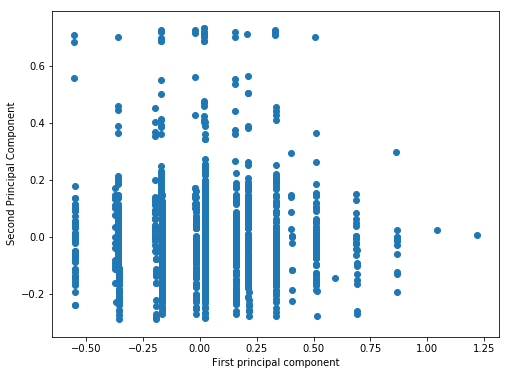

In [26]:
# plot the dataset
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [27]:
# perfrom KMeans Clustering on the dataset

def doKmeans(X, nclust=2):
    model = KMeans(nclust, random_state=10)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    
    return (clust_labels, cent, model)

clust_labels, cent, model = doKmeans(X_pca, 2)
kmeans = pd.DataFrame(clust_labels)

In [28]:
clust_labels

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

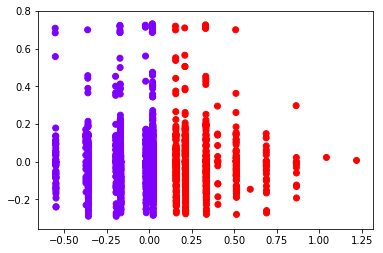

In [29]:
plt.figure('K-means with 2 clusters')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_, cmap='rainbow')
plt.show()

In [30]:
# Generate test data
columns = dataset.columns
test_data = [["MS0001", 0.05, 0.3, 0.3, 0.3, 0.3, 0.3],
             ["MS0002", 0.08, 0.3, 0.3, 0.3, 0.3, 0.3],
             ["MS0003", 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
             ["MS0004", 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
             ["MS0005", 0.75, 0.75, 0.75, 0.75, 0.75, 0.75],
             ["MS0006", 1, 1, 1, 1, 1, 1]]
df_test = pd.DataFrame(test_data, columns=columns)

In [31]:
continuous_columns = ['Other skills', 'Performance_PG', 'Performance_UG', 'Performance_12', 'Performance_10']
mean = df_test.loc[:, continuous_columns].mean()
std = df_test.loc[:, continuous_columns].std()
df_test.loc[:, continuous_columns] = (df_test.loc[:, continuous_columns] - mean) / std

In [32]:
App_ID = np.array(df_test["Application ID"])
X_test = df_test.drop("Application ID", axis=1)
X_test = X_test * coef

In [33]:
# perform pca transform on the test dataset
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(6, 2)

In [34]:
model.predict(X_test_pca)

array([0, 0, 0, 0, 1, 1], dtype=int32)

In [35]:
# predict the results for test data
def euclidDistance(x, mean_skill):
    x1, y1 = x
    x2, y2 = mean_skill
    
    return(math.sqrt((x1-x2)**2 + (y1-y2)**2))

predictions = model.predict(X_test_pca)

print("[INFO] Higher the Skill Gap, less the chance to qualify.\n")
for (i, pred) in enumerate(predictions):
    if pred == 1:
        print("Candidate {} is qualified for the interview.\n".format(App_ID[i]))
    else:
        print("Candidate {} is not qualified for the interview.".format(App_ID[i]))
    
        t = X_test_pca[i]
        euclidDist = []
        for point in cent:
            euclidDist.append(euclidDistance(t, point))


        gap = abs(euclidDist[0] - euclidDist[1])
        print("Skill Gap: {:.2f}\n".format((gap)*10))
        

[INFO] Higher the Skill Gap, less the chance to qualify.

Candidate MS0001 is not qualified for the interview.
Skill Gap: 3.95

Candidate MS0002 is not qualified for the interview.
Skill Gap: 3.90

Candidate MS0003 is not qualified for the interview.
Skill Gap: 2.96

Candidate MS0004 is not qualified for the interview.
Skill Gap: 1.07

Candidate MS0005 is qualified for the interview.

Candidate MS0006 is qualified for the interview.

